**Customer Segmentation**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Preprocessing
customer_features = customers.copy()
transaction_summaries = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
customer_features = customer_features.merge(transaction_summaries, on="CustomerID", how="left")
customer_features.fillna(0, inplace=True)

In [4]:
# Prepare features for clustering
cluster_features = customer_features[['TotalValue', 'Quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

In [5]:
# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choosing 5 clusters
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [6]:
# Add cluster labels to dataset
customer_features['Cluster'] = labels

In [7]:
# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7529350579420507


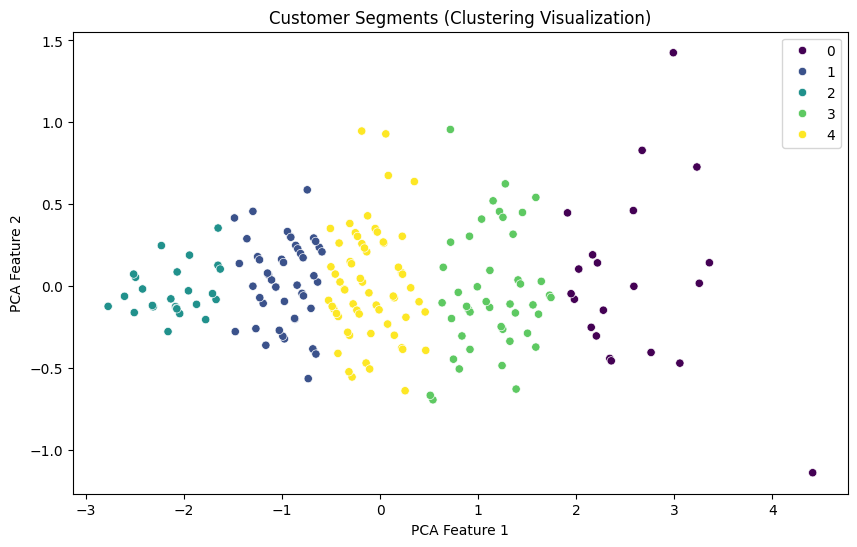

In [8]:
# Visualize clusters
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=labels, palette='viridis', legend="full")
plt.title("Customer Segments (Clustering Visualization)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

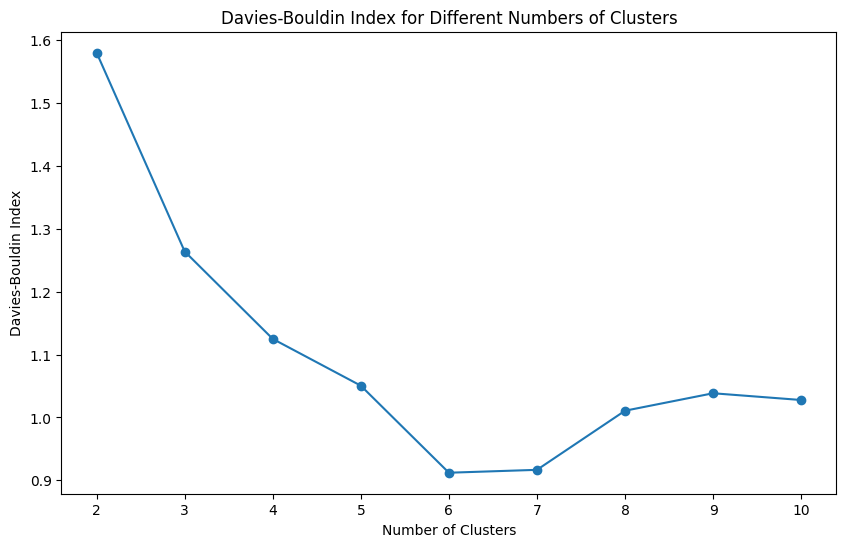

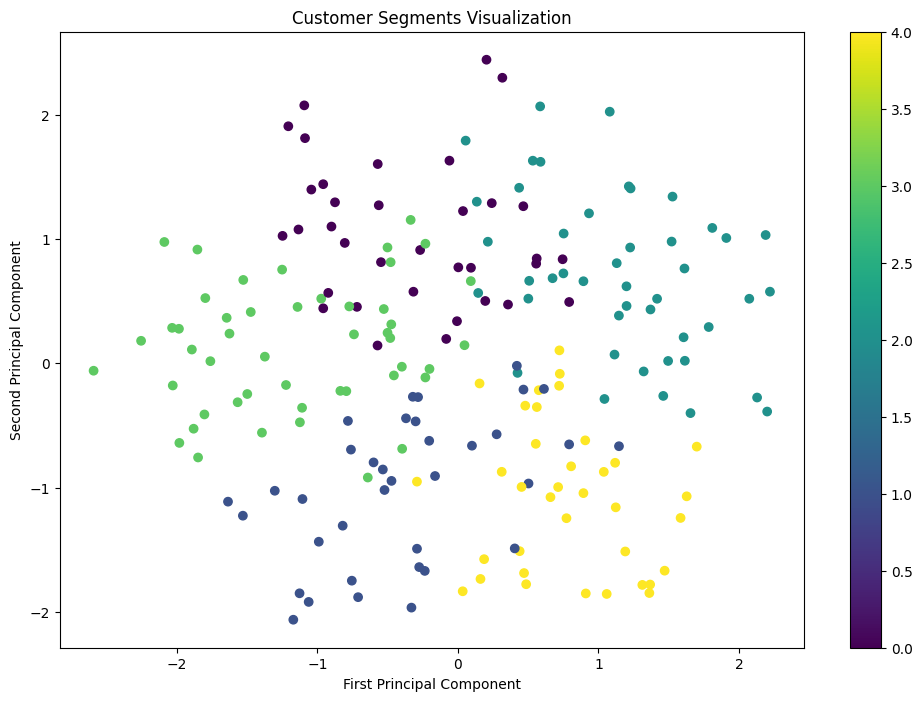

Davies-Bouldin Index: 1.0504530192815493
Cluster Characteristics:
          TotalValue   Quantity  TransactionID
Cluster                                       
0        6522.133026  13.657143     716.714286
1        1877.118958  11.194444     335.388889
2        4913.936779  38.044444     735.555556
3        7876.086997  18.500000     220.979167
4        2563.230450  39.972222     250.694444


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample customer features dataset
customer_features = pd.DataFrame({
    'CustomerID': [f'C{i:04d}' for i in range(1, 201)],
    'TotalValue': np.random.uniform(100, 10000, 200),
    'Quantity': np.random.randint(1, 50, 200),
    'TransactionID': np.random.randint(1, 1000, 200)
})

# Prepare features for clustering
cluster_features = ['TotalValue', 'Quantity', 'TransactionID']
X = customer_features[cluster_features]

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Find optimal number of clusters using Davies-Bouldin Index
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_normalized)
    db_scores.append(davies_bouldin_score(X_normalized, kmeans.labels_))

# Plot DB Index to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Choose the optimal number of clusters (e.g., 5 based on the lowest DB Index)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X_normalized)

# Visualize clusters using PCA (reduce dimensions to 2D for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Calculate DB Index for the optimal clustering
db_index = davies_bouldin_score(X_normalized, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Analyze cluster characteristics
cluster_summary = customer_features.groupby('Cluster')[cluster_features].mean()
print("Cluster Characteristics:")
print(cluster_summary)

Davies-Bouldin Index: 2.4386348951526675


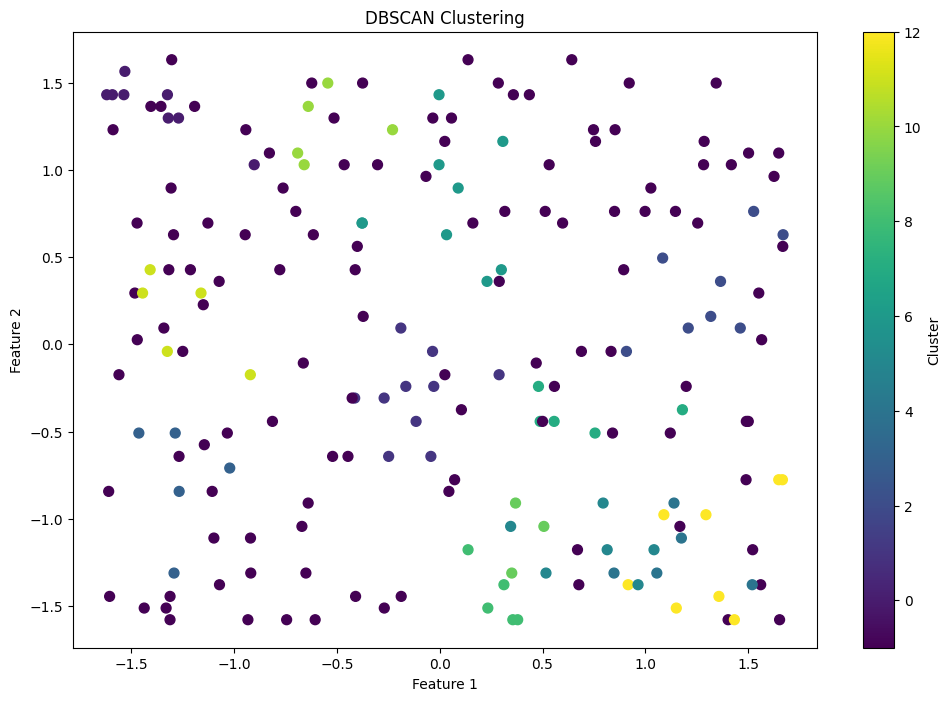

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'TransactionID']])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on data
customer_features['Cluster'] = dbscan.fit_predict(X_normalized)

# Calculate Davies-Bouldin Index (only for non-noise clusters)
valid_clusters = customer_features[customer_features['Cluster'] != -1]
db_index = davies_bouldin_score(valid_clusters[['TotalValue', 'Quantity', 'TransactionID']], valid_clusters['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

Silhouette Score: 0.26746852594671755


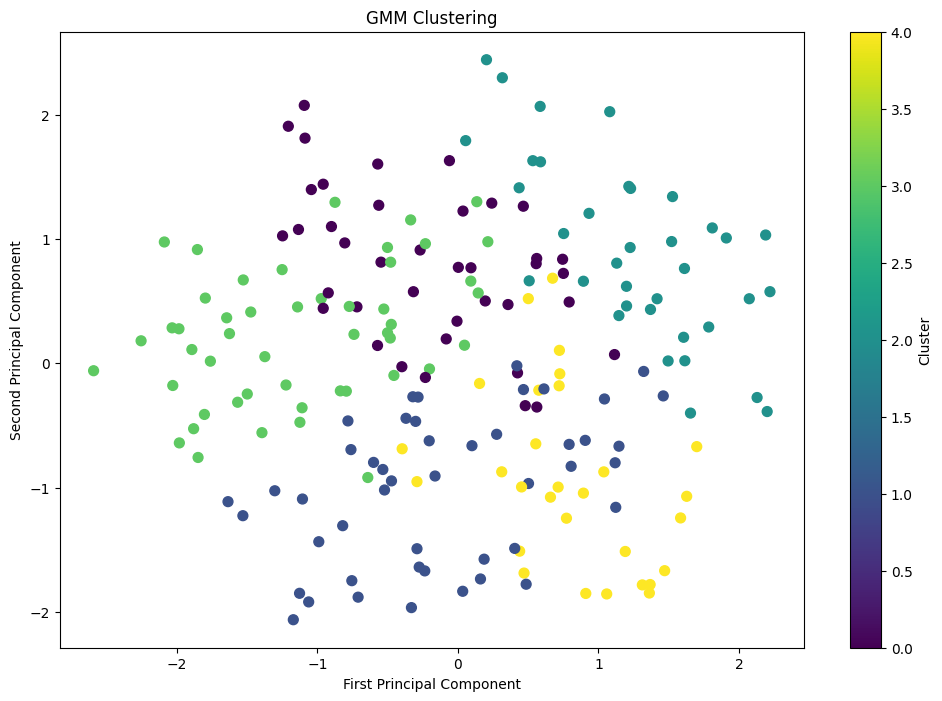

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'TransactionID']])

# Apply GMM with an optimal number of components (clusters)
gmm = GaussianMixture(n_components=5, random_state=42)  # Adjust n_components based on evaluation
customer_features['Cluster'] = gmm.fit_predict(X_normalized)

# Calculate Silhouette Score for evaluation
silhouette_avg = silhouette_score(X_normalized, customer_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.title('GMM Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()